<a href="https://colab.research.google.com/github/Hyolinkim/capstoneDesign_20210830/blob/main/dataScalingNorm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#normal case 100 exchange to scaling data
for i in range(1,101):
  filename='/content/drive/MyDrive/Sensorlog/raw/Normal/Normal_case' + str(i) + '.csv'

  #io와 pandas 모듈 import
  import io
  import pandas as pd
  import numpy as np
  from pandas import Series, DataFrame
  from numpy import nan as NA
  import matplotlib.pyplot as plt

  #pandas read_csv로 불러오기
  data = pd.read_csv(filename)

  #pandas read_csv로 불러오기
  data = pd.read_csv(filename)
  data.columns = ['SamplingTime','AcX', 'AcY','AcZ','GyroX','GyroY','GyroZ','-','-','-']

  data=data.drop(['-'],axis=1)
  #데이터 중에 가끔 마지막 데이터가 들어가지 않는 것이 있는데
  #그거는 삭제해준다.
  data=data.drop(data['SamplingTime'].size-1, axis=0)

  data_df=data[['AcX', 'AcY','AcZ','GyroX','GyroY','GyroZ']]
  data_st=data[['SamplingTime']]
  #-----------------데이터 정리--------------------

  #정규화
  from sklearn.preprocessing import MinMaxScaler
  transformer = MinMaxScaler()
  transformer.fit(data_df)
  data_df = transformer.transform(data_df)
  #print(data_df)

  #데이터 베열을 dataframe으로 변경
  dataset=pd.DataFrame(data_df)
  dataset

  data_final=pd.concat([data_st,dataset], axis=1)
  #데이터에 라벨 달아줌 normal = 0, warning1 = 1, warning2 = 2, warning3 = 3
  data_final['label']=0

  #스케일링 한 데이터를 csv파일로 저장
  data_final.to_csv('/content/drive/MyDrive/Sensorlog/Scaling/Normal/Normal_Scaling_case' + str(i) + '.csv')

In [ ]:
#Warning1 case 100 exchange to scaling data
for i in range(1,101):
  filename='/content/drive/MyDrive/Sensorlog/raw/Warning1/Warning1_case' + str(i) + '.csv'

  #io와 pandas 모듈 import
  import io
  import pandas as pd
  import numpy as np
  from pandas import Series, DataFrame
  from numpy import nan as NA
  import matplotlib.pyplot as plt

  #pandas read_csv로 불러오기
  data = pd.read_csv(filename)

  #pandas read_csv로 불러오기
  data = pd.read_csv(filename)
  data.columns = ['SamplingTime','AcX', 'AcY','AcZ','GyroX','GyroY','GyroZ','-','-','-']

  data=data.drop(['-'],axis=1)
  #데이터 중에 가끔 마지막 데이터가 들어가지 않는 것이 있는데
  #그거는 삭제해준다.
  data=data.drop(data['SamplingTime'].size-1, axis=0)

  data_df=data[['AcX', 'AcY','AcZ','GyroX','GyroY','GyroZ']]
  data_st=data[['SamplingTime']]
  #-----------------데이터 정리--------------------

  #정규화
  from sklearn.preprocessing import MinMaxScaler
  transformer = MinMaxScaler()
  transformer.fit(data_df)
  data_df = transformer.transform(data_df)
  #print(data_df)

  #데이터 베열을 dataframe으로 변경
  dataset=pd.DataFrame(data_df)
  dataset

  data_final=pd.concat([data_st,dataset], axis=1)
  #데이터에 라벨 달아줌 normal = 0, warning1 = 1, warning2 = 2, warning3 = 3
  data_final['label']=1

  #스케일링 한 데이터를 csv파일로 저장
  data_final.to_csv('/content/drive/MyDrive/Sensorlog/Scaling/Warning1/Warning1_Scaling_case' + str(i) + '.csv')

In [ ]:
filename_raw='/content/drive/MyDrive/Sensorlog/raw/Normal/Normal_case2.csv'
filename_norm='/content/drive/MyDrive/캡스톤디자인_인공지능/Label0_Normal/Norm/Normal_Scaling_case2.csv'
filename_stand = '/content/drive/MyDrive/캡스톤디자인_인공지능/Label0_Normal/Standard/Normal_ScalingStandard_case2.csv'

In [ ]:
 #io와 pandas 모듈 import
import io
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
import matplotlib.pyplot as plt

In [ ]:
#pandas read_csv로 불러오기
data = pd.read_csv(filename_raw)

data.columns = ['SamplingTime','AcX', 'AcY','AcZ','GyroX','GyroY','GyroZ','-','-','-']
data=data.drop(['-'],axis=1)
#데이터 중에 가끔 마지막 데이터가 들어가지 않는 것이 있는데
#그거는 삭제해준다.
data=data.drop(data['SamplingTime'].size-1, axis=0)

#data_df=data[['AcX', 'AcY','AcZ','GyroX','GyroY','GyroZ']]
data_dfa=data[['AcX', 'AcY','AcZ']]
data_dfgx=data[['GyroX']]
data_dfgy=data[['GyroY']]
data_dfgz=data[['GyroZ']]
data_dfx=data[['AcX']]
data_dfy=data[['AcY']]
data_dfz=data[['AcZ']]
#data_raw = np.array(data_df)
data_rawgx = np.array(data_dfgx)
data_rawgy = np.array(data_dfgy)
data_rawgz = np.array(data_dfgz)
data_rawx = np.array(data_dfx)
data_rawy = np.array(data_dfy)
data_rawz = np.array(data_dfz)
data_rawa = np.array(data_dfa)

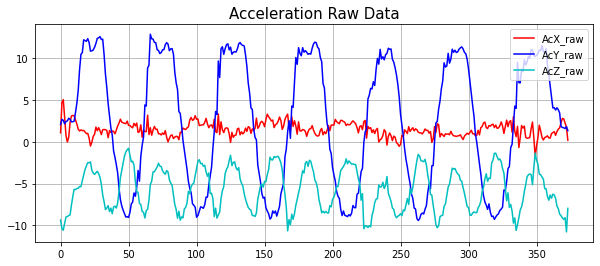

In [ ]:
#Normal 원본 데이터 가속도
plt.figure(figsize=(10,4))
plt.plot(range(len(data_dfx)), data_rawx, 'r',
         range(len(data_dfy)), data_rawy,'b',
         range(len(data_dfz)), data_rawz, 'c') 
plt.title('Acceleration Raw Data', size=15)
plt.legend(['AcX_raw', 'AcY_raw', 'AcZ_raw'], loc=1)
plt.grid(True)
#plt.axis([0, 100, -11, -11])
plt.show()

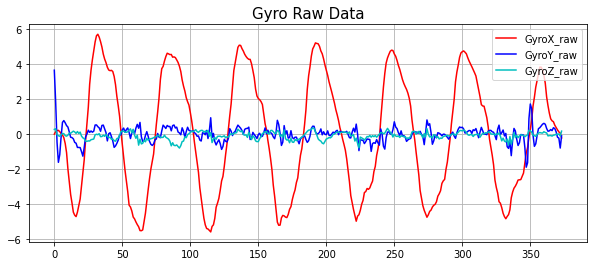

In [ ]:
#Normal 원본 데이터 자이로
plt.figure(figsize=(10,4))
plt.plot(range(len(data_dfgx)), data_rawgx, 'r',
         range(len(data_dfgy)), data_rawgy,'b',
         range(len(data_dfgz)), data_rawgz, 'c') 
plt.title('Gyro Raw Data', size=15)
plt.legend(['GyroX_raw', 'GyroY_raw', 'GyroZ_raw'], loc=1)
plt.grid(True)
#plt.axis([0, 100, -11, -11])
plt.show()

In [ ]:
#pandas read_csv로 불러오기
data = pd.read_csv(filename_norm)

data.columns = ['-','SamplingTime','AcX', 'AcY','AcZ','GyroX','GyroY','GyroZ','label']
data=data.drop(['-'],axis=1)
#데이터 중에 가끔 마지막 데이터가 들어가지 않는 것이 있는데
#그거는 삭제해준다.
data=data.drop(data['SamplingTime'].size-1, axis=0)

#data_df=data[['AcX', 'AcY','AcZ','GyroX','GyroY','GyroZ']]
data_dfa=data[['AcX', 'AcY','AcZ']]
#data_df=data[['GyroX']]
data_dfx=data[['AcX']]
data_dfy=data[['AcY']]
data_dfz=data[['AcZ']]
data_dfgx=data[['GyroX']]
data_dfgy=data[['GyroY']]
data_dfgz=data[['GyroZ']]
#data_norm=np.array(data_df)
data_normgx = np.array(data_dfgx)
data_normgy = np.array(data_dfgy)
data_normgz = np.array(data_dfgz)
data_normx = np.array(data_dfx)
data_normy = np.array(data_dfy)
data_normz = np.array(data_dfz)
data_norma = np.array(data_dfa)
#data_df

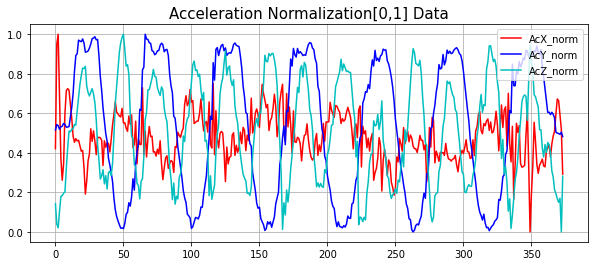

In [ ]:
#Normal 정규화[0,1] 데이터
plt.figure(figsize=(10,4))
plt.plot(range(len(data_dfx)), data_normx, 'r',
         range(len(data_dfy)), data_normy,'b',
         range(len(data_dfz)), data_normz, 'c') 
plt.title('Acceleration Normalization[0,1] Data', size=15)
plt.legend(['AcX_norm', 'AcY_norm', 'AcZ_norm'], loc=1)
plt.grid(True)
#plt.axis([0, 100, -11, -11])
plt.show()

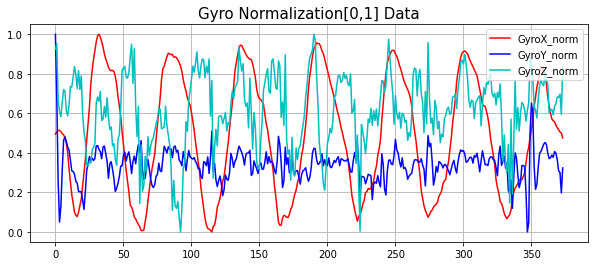

In [ ]:
#Normal 정규화[0,1] 데이터 자이로
plt.figure(figsize=(10,4))
plt.plot(range(len(data_dfgx)), data_normgx, 'r',
         range(len(data_dfgy)), data_normgy,'b',
         range(len(data_dfgz)), data_normgz, 'c') 
plt.title('Gyro Normalization[0,1] Data', size=15)
plt.legend(['GyroX_norm', 'GyroY_norm', 'GyroZ_norm'], loc=1)
plt.grid(True)
#plt.axis([0, 100, -11, -11])
plt.show()

In [ ]:
#pandas read_csv로 불러오기
data = pd.read_csv(filename_stand)

data.columns = ['-','SamplingTime','AcX', 'AcY','AcZ','GyroX','GyroY','GyroZ','label']
data=data.drop(['-'],axis=1)
#데이터 중에 가끔 마지막 데이터가 들어가지 않는 것이 있는데
#그거는 삭제해준다.
data=data.drop(data['SamplingTime'].size-1, axis=0)

#data_df=data[['AcX', 'AcY','AcZ','GyroX','GyroY','GyroZ']]
data_dfa=data[['AcX', 'AcY','AcZ']]
#data_df=data[['GyroX']]
data_dfx=data[['AcX']]
data_dfy=data[['AcY']]
data_dfz=data[['AcZ']]
data_dfgx=data[['GyroX']]
data_dfgy=data[['GyroY']]
data_dfgz=data[['GyroZ']]
#data_norm=np.array(data_df)
data_standgx = np.array(data_dfgx)
data_standgy = np.array(data_dfgy)
data_standgz = np.array(data_dfgz)
data_standx = np.array(data_dfx)
data_standy = np.array(data_dfy)
data_standz = np.array(data_dfz)
data_standa = np.array(data_dfa)
#data_df

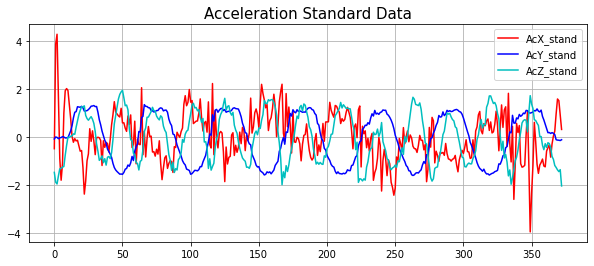

In [ ]:
#Normal 표준화 데이터
plt.figure(figsize=(10,4))
plt.plot(range(len(data_dfx)), data_standx, 'r',
         range(len(data_dfy)), data_standy,'b',
         range(len(data_dfz)), data_standz, 'c') 
plt.title('Acceleration Standard Data', size=15)
plt.legend(['AcX_stand', 'AcY_stand', 'AcZ_stand'], loc=1)
plt.grid(True)
#plt.axis([0, 100, -11, -11])
plt.show()

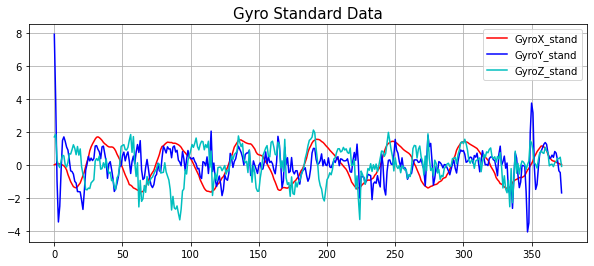

In [ ]:
#Normal 표준화 데이터 자이로
plt.figure(figsize=(10,4))
plt.plot(range(len(data_dfgx)), data_standgx, 'r',
         range(len(data_dfgy)), data_standgy,'b',
         range(len(data_dfgz)), data_standgz, 'c') 
plt.title('Gyro Standard Data', size=15)
plt.legend(['GyroX_stand', 'GyroY_stand', 'GyroZ_stand'], loc=1)
plt.grid(True)
#plt.axis([0, 100, -11, -11])
plt.show()

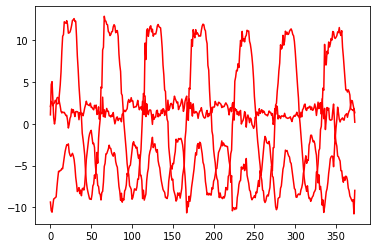

In [ ]:
#필요
#잘된 운동 원본 데이터
plt.plot(range(len(data_dfa)), data_rawa, 'r'
         ) 
#plt.axis([0, 100, -11, -11])
plt.show()

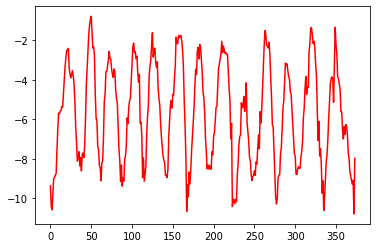

In [ ]:
#필요
#잘된 운동 원본 데이터
plt.plot(range(len(data_dfz)), data_rawz, 'r'
         ) 
#plt.axis([0, 100, -11, -11])
plt.show()

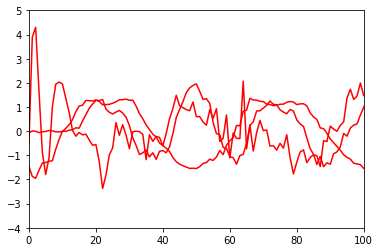

In [ ]:
#필요
#잘된 운동 원본 데이터
plt.plot(range(len(data_dfa)), data_standa, 'r'
         ) 
plt.axis([0, 100, -4, 5])
plt.show()

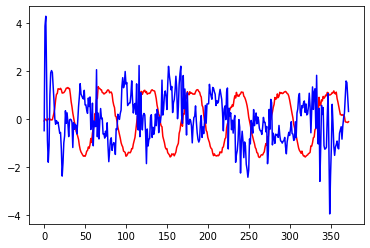

In [ ]:
#필요
#잘된 운동 원본 데이터
plt.plot(range(len(data_dfy)), data_standy, 'r',
         range(len(data_dfx)), data_standx,'b') 
#plt.axis([0, 100, -11, -11])
plt.show()

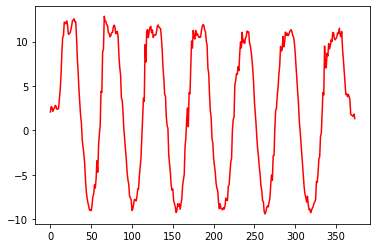

In [ ]:
#필요
#잘된 운동 원본 데이터
plt.plot(range(len(data_dfy)), data_rawy, 'r'
         ) 
#plt.axis([0, 100, -11, -11])
plt.show()

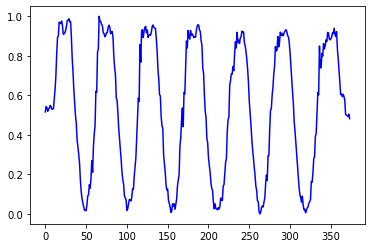

In [ ]:
#필요
#잘된 운동 원본 데이터
plt.plot(range(len(data_dfy)),data_normy, 'b') 
#plt.axis([0, 100, 0, 2])
plt.show()

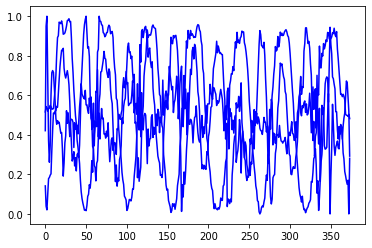

In [ ]:
#필요
plt.plot(range(len(data_dfa)), data_norma, 'b'
         ) 
#plt.axis([0, 100, -11, -11])
plt.show()

In [ ]:
filename='/content/drive/MyDrive/Sensorlog/raw/Normal/Normal_case1.csv'

#io와 pandas 모듈 import
import io
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
import matplotlib.pyplot as plt

#pandas read_csv로 불러오기
data = pd.read_csv(filename)

#pandas read_csv로 불러오기
data = pd.read_csv(filename)
data.columns = ['SamplingTime','AcX', 'AcY','AcZ','GyroX','GyroY','GyroZ','-','-','-']

data=data.drop(['-'],axis=1)
#데이터 중에 가끔 마지막 데이터가 들어가지 않는 것이 있는데
#그거는 삭제해준다.
data=data.drop(data['SamplingTime'].size-1, axis=0)

data_df=data[['AcX', 'AcY','AcZ','GyroX','GyroY','GyroZ']]
data_st=data[['SamplingTime']]
#-----------------데이터 정리--------------------

#정규화
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler()
transformer.fit(data_df)
data_df = transformer.transform(data_df)
#print(data_df)

#데이터 베열을 dataframe으로 변경
dataset=pd.DataFrame(data_df)
dataset

data_final=pd.concat([data_st,dataset], axis=1)
#데이터에 라벨 달아줌 normal = 0, warning1 = 1, warning2 = 2, warning3 = 3
data_final['label']=0

#스케일링 한 데이터를 csv파일로 저장
data_final.to_csv('/content/drive/MyDrive/Sensorlog/Norm/Normal/Normal_Scaling_case1.csv')

In [ ]:
data_final

,SamplingTime,0,1,2,3,4,5,label
0,1.634224e+09,1.000000,0.445423,0.012284,0.502074,0.692325,0.650021,0
1,1.634224e+09,0.728125,0.448424,0.091303,0.513359,0.205356,0.561408,0
2,1.634224e+09,0.404237,0.439367,0.145901,0.511796,0.361250,0.636246,0
3,1.634224e+09,0.286779,0.433224,0.163588,0.507255,0.628963,0.693221,0
4,1.634224e+09,0.381729,0.441299,0.134393,0.501441,0.689688,0.650824,0
...,...,...,...,...,...,...,...,...
364,1.634224e+09,0.130357,0.844098,0.648815,0.498343,0.541166,0.547400,0
365,1.634224e+09,0.171023,0.838898,0.626452,0.500219,0.557619,0.554506,0
366,1.634224e+09,0.075014,0.851036,0.772571,0.536519,0.528265,0.580201,0
367,1.634224e+09,0.246416,0.823592,0.657488,0.512479,0.535267,0.482507,0
